# **시각화 과제**
▶ 앞으로 토나오게(...) 사용할 **그래프 유형을 학습**하는 데에 주안점을 두고 진행해주세요!

In [7]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")  # matplotlib style 설정

# 사진 파일 불러오기
!pip install IPython
from IPython.display import Image

# 문법 변경에 의한 경고를 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 안 깨지게 설정
import platform
from matplotlib import font_manager

def set_korean_font():
    """
    운영체제에 맞는 한글 폰트를 설정합니다.
    """
    os_name = platform.system()
    
    if os_name == 'Windows':
        font_name = 'Malgun Gothic'
    elif os_name == 'Darwin': # macOS
        font_name = 'AppleGothic'

    # 전역으로 폰트 설정
    plt.rc('font', family=font_name)
    
    # 마이너스 부호 깨짐 방지 설정
    plt.rc('axes', unicode_minus=False)
    
    print(f"'{font_name}' 폰트로 설정되었습니다.")

set_korean_font()


'Malgun Gothic' 폰트로 설정되었습니다.


### (0) titanic_set.csv 데이터를 변수 data로 불러오세요.

In [58]:
# pandas 모듈의 read_csv() 이용하여 코드 작성

data=pd.read_csv('./titanic.csv')
Survived=pd.get_dummies(data['Survived'],drop_first=True,dtype=int)
data['Survived']=Survived
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


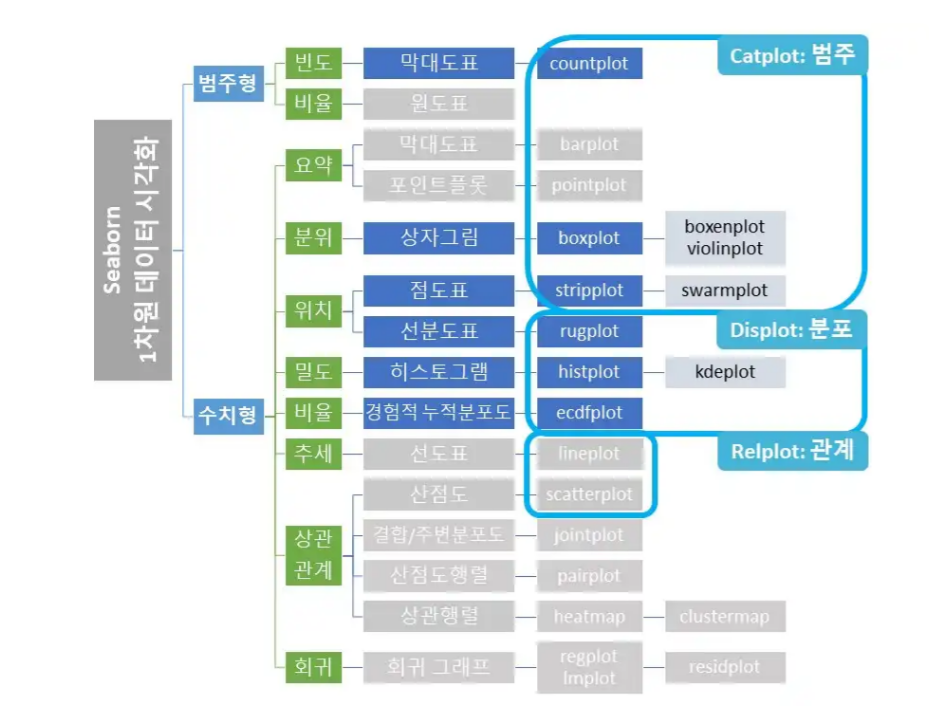

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> countplot(범주형), histplot(수치형) </span>
▶ 데이터의 분포와 빈도를 시각화하는 기본적인 플롯

<Axes: xlabel='Survived', ylabel='count'>

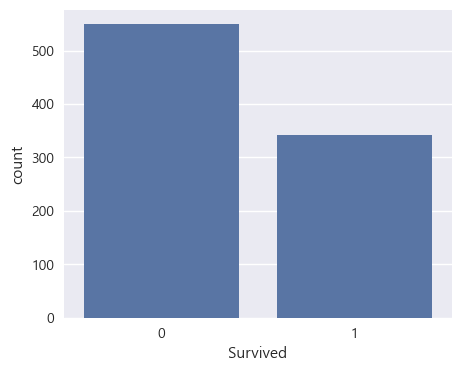

In [59]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

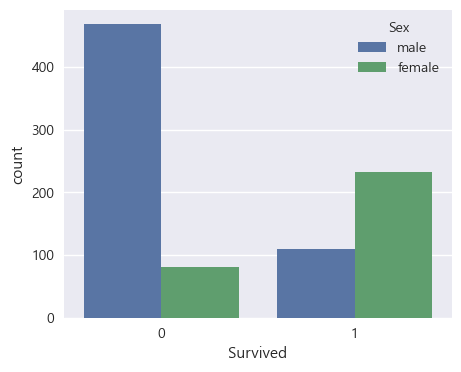

In [60]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Survived',hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

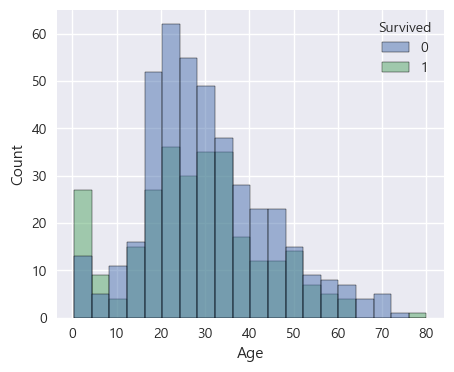

In [61]:
plt.figure(figsize=(5,4))
sns.histplot(data=data,x="Age",hue='Survived')

### (1) 승선항(Embarked)별 생존여부를 hue파라미터를 이용해 확인해보세요.

<Axes: xlabel='Embarked', ylabel='Count'>

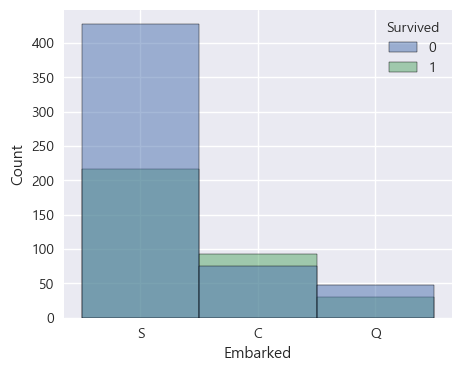

In [62]:
# 코드 작성
plt.figure(figsize=(5,4))
sns.histplot(data=data,x='Embarked',hue='Survived')

<Axes: xlabel='Embarked', ylabel='Count'>

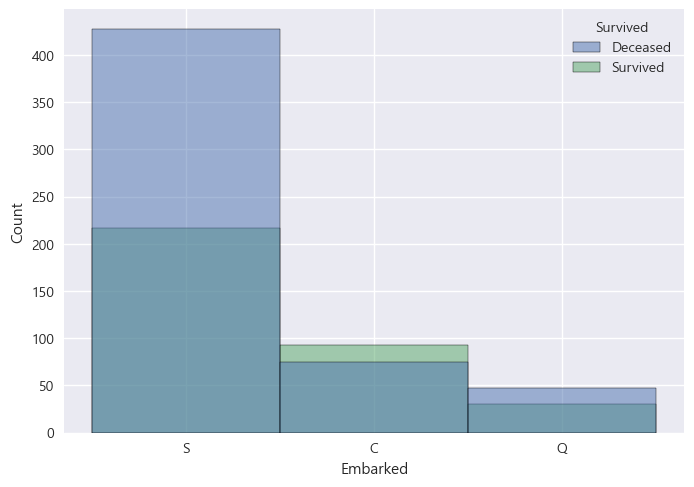

In [15]:
sns.histplot(data=data,x='Embarked',hue='Survived')

### (2) 나이대별 생존여부를 hue파라미터를 이용해 확인해보세요.

<Axes: xlabel='Age', ylabel='Count'>

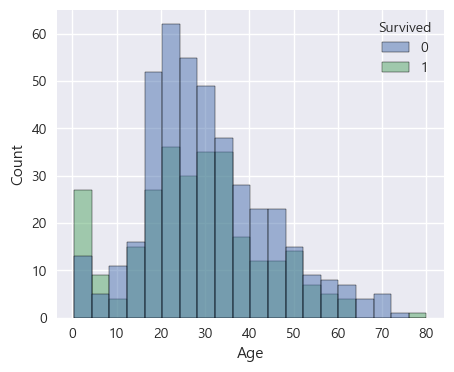

In [64]:
plt.figure(figsize=(5,4))
sns.histplot(data=data,x='Age',hue='Survived')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> displot, kdeplot(커널밀도함수) </span> 

▶ 히스토그램을 매끄럽게 곡선으로 연결한 그래프 <br>
▶ displot 함수의 kde 파라미터에 True를 전달하면 밀도 곡선이 표현됨

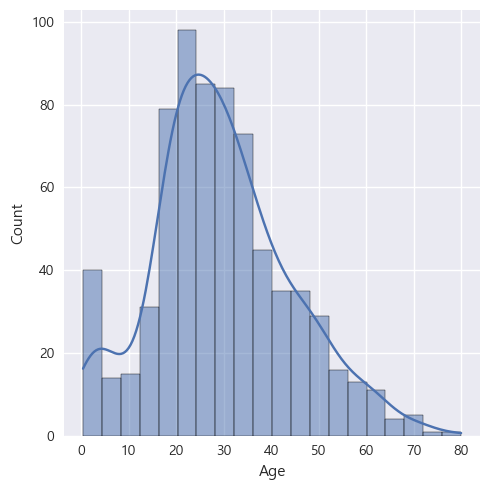

In [63]:
sns.displot(data["Age"],kde=True)

<Figure size 500x400 with 0 Axes>

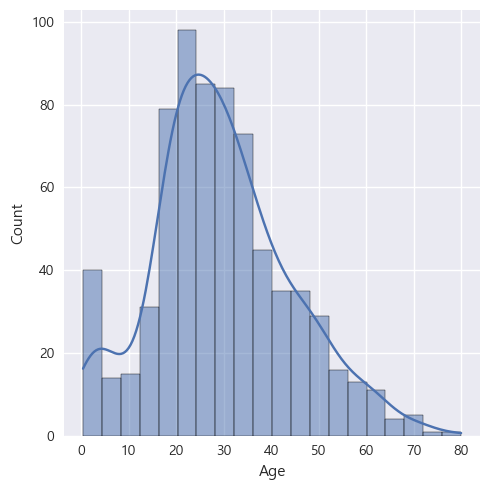

In [65]:
plt.figure(figsize=(5,4))
sns.displot(data["Age"],kde=True)

<Axes: xlabel='Age', ylabel='Density'>

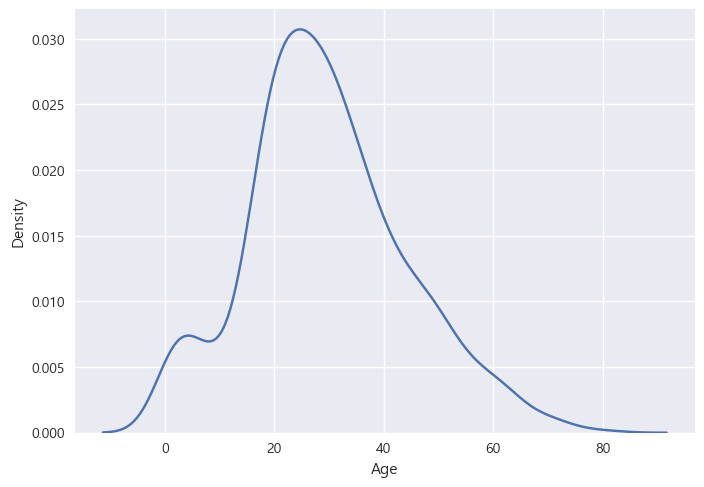

In [19]:
sns.kdeplot(data["Age"])

### (3) displot으로 요금(Fare)의 분포를 확인해보세요.

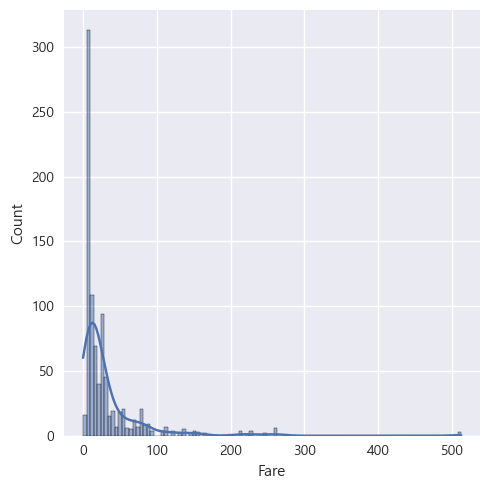

In [66]:
# 코드 작성
sns.displot(data['Fare'],kde=True)

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> barplot(범주형), pointplot(연속형)</span>
▶ x에 따른 y의 평균값을 나타내는 그래프

<Axes: xlabel='Sex', ylabel='Age'>

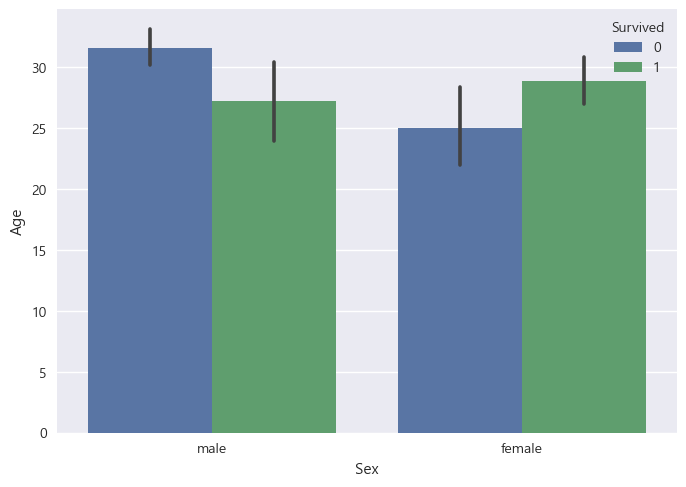

In [67]:
sns.barplot(data=data, x='Sex', y='Age', hue="Survived")

<Axes: xlabel='Age', ylabel='Fare'>

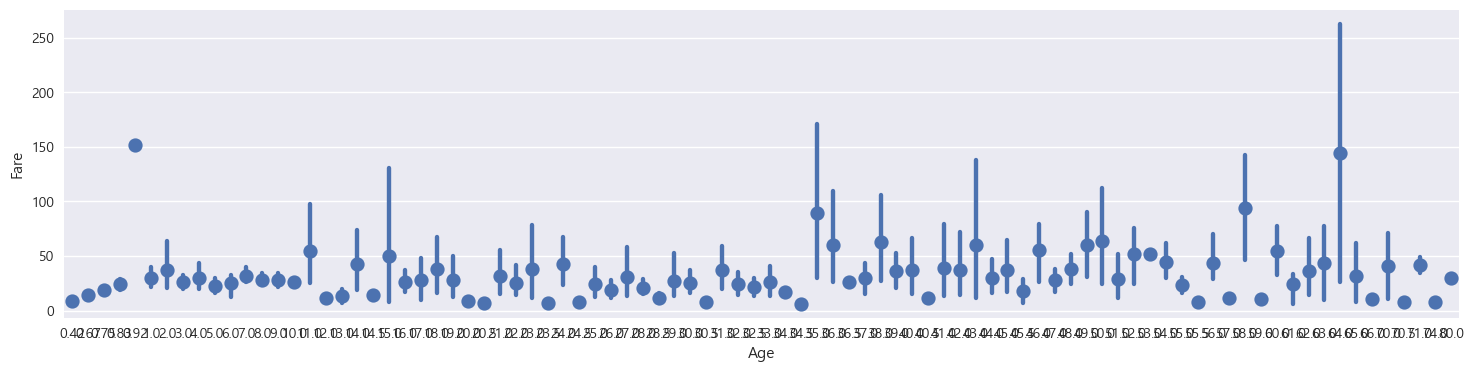

In [68]:
plt.figure(figsize=(18,4))
sns.pointplot(data=data,x='Age',y='Fare',linestyles="")

### (4) Pclass 별 생존율을 barplot을 통해 확인해보세요.

<Axes: xlabel='Pclass', ylabel='Survived'>

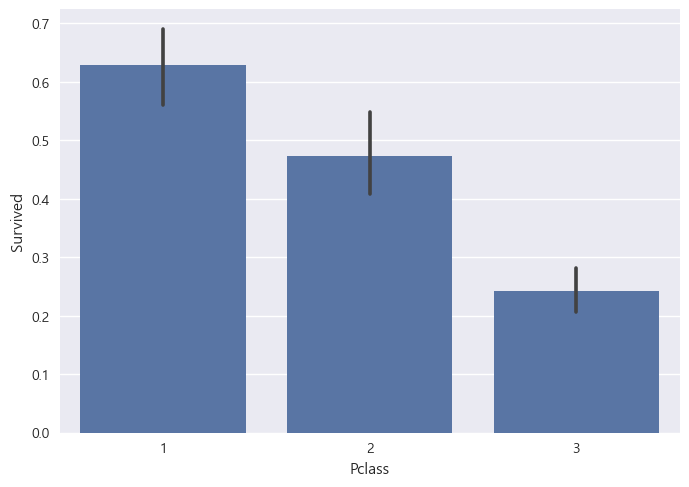

In [69]:
# 코드 작성
sns.barplot(data=data,x='Pclass',y='Survived')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> boxplot</span>

▶데이터의 중앙값, 사분위수, 그리고 이상치를 시각적으로 표현하는 그래프

<Axes: xlabel='Pclass', ylabel='Age'>

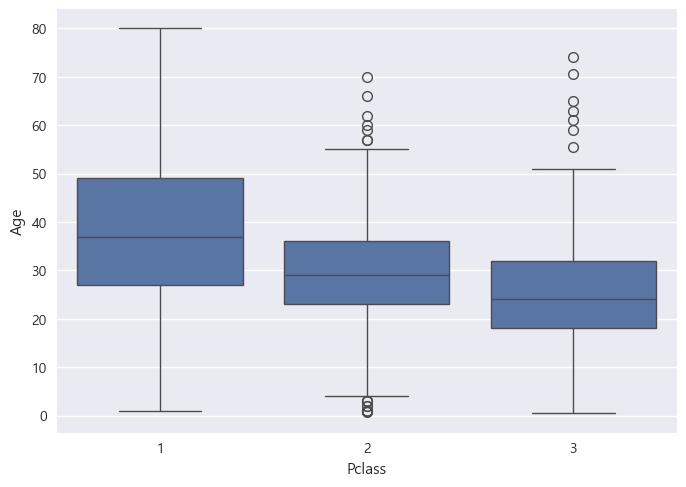

In [70]:
sns.boxplot(data=data, x='Pclass', y='Age')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> scatterplot</span> 

▶ 데이터를 점으로 찍어 분포를 보는 산점도 그래프 <br>
▶ 두 연속변수간의 상관관계를 확인할 때 유용함

<Axes: xlabel='Age', ylabel='Fare'>

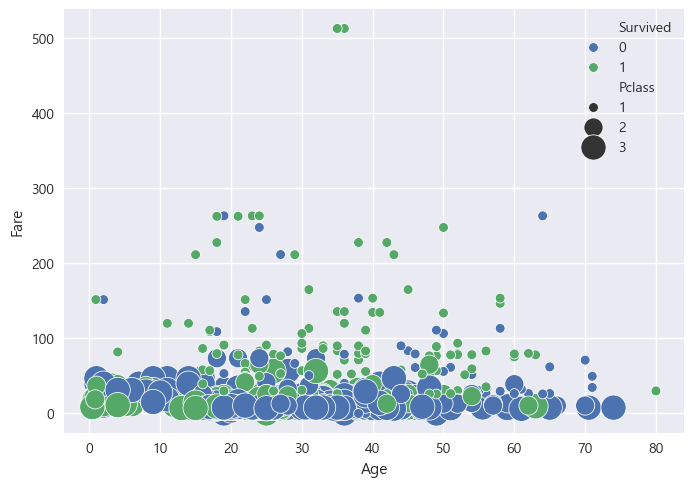

In [71]:
sns.scatterplot(data=data, x="Age",y='Fare',hue="Survived", 
                size='Pclass', sizes=(50,330))

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> regplot</span>

▶ 회귀선이 추가된 산점도 그래프 <br>
▶ 두 개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄

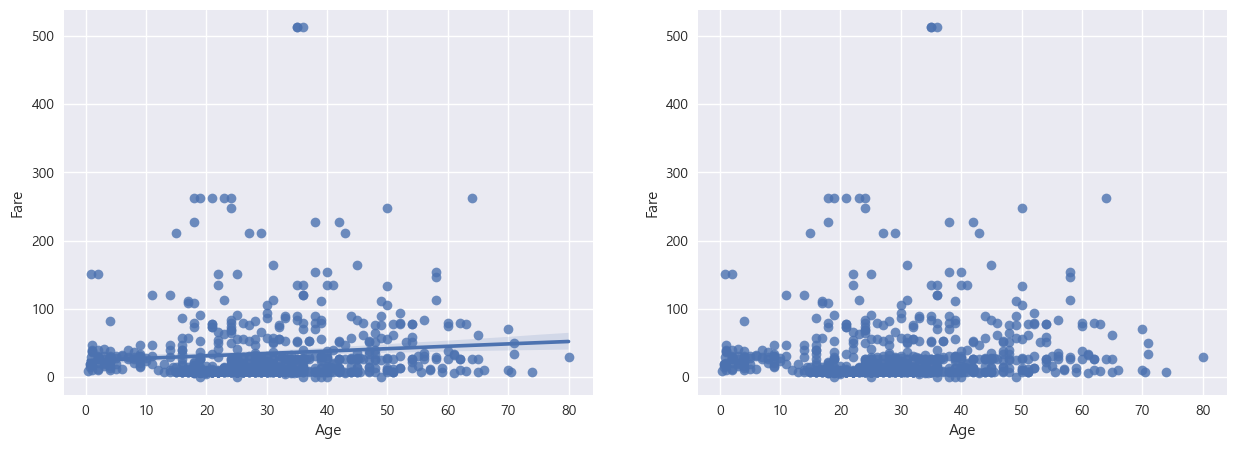

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='Age',y='Fare',data=data,ax=ax1) ## 회귀선 있는 버전
sns.regplot(x='Age',y='Fare',data=data, ax=ax2, fit_reg=False) ## 회귀선 없는 버전

plt.show()

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> pieplot</span> 

▶ 데이터의 비율을 시각적으로 표현하는 데 사용

Text(0.5, 1.0, 'Embarked')

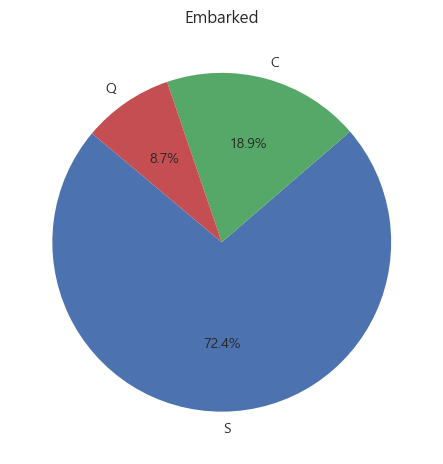

In [73]:
embarked_counts = data['Embarked'].value_counts()
plt.pie(embarked_counts, labels=embarked_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.title("Embarked")

### (5) Pclass를 파이플롯으로 나타내보세요.

Text(0.5, 1.0, 'Pclass')

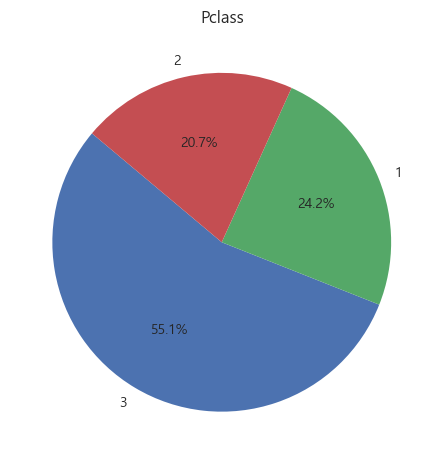

In [74]:
# 'embarked_counts'에 새로운 값을 할당하여 코드 작성
Pclass_counts= data['Pclass'].value_counts()
plt.pie(Pclass_counts, labels=Pclass_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Pclass')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> heatmap</span> 

▶ 변수간 상관계수를 직관적 볼 수 있는 그래프 <br>
▶ corr()함수로 변수간의 상관계수를 구하고 이를 히트맵에 표현할 수 있음

### (6) 수치형 변수만 모아 새로운 데이터 프레임을 만들고 히트맵을 찍어보겠습니다.

<Axes: >

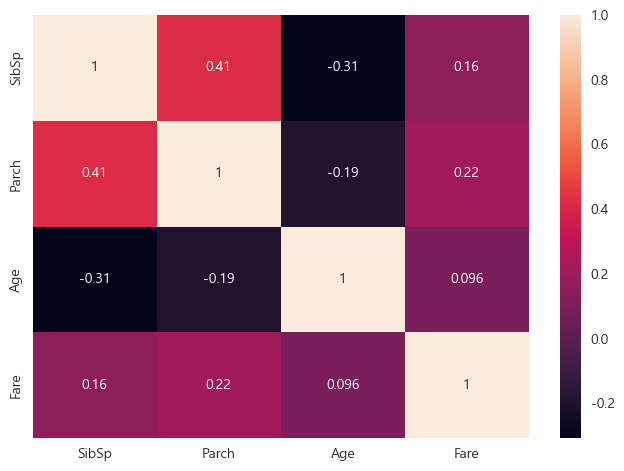

In [75]:
df= data[['SibSp','Parch','Age', 'Fare']]
sns.heatmap(df.corr(),annot=True) 
#annot 파라미터는 상관계수 표시 여부 결정

<Axes: >

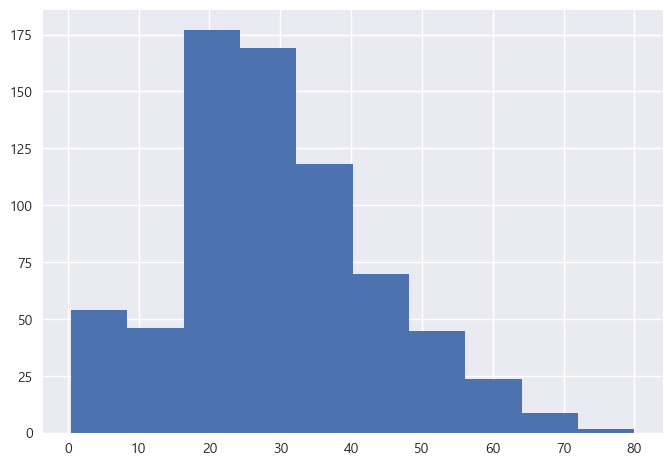

In [76]:
data['Age'].hist()

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> catplot</span> 

▶ 범주형 데이터와 연속형 데이터를 함께 시각화할 수 있음

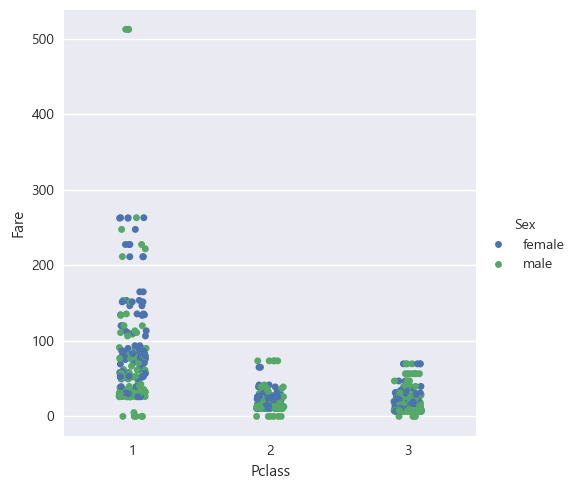

In [77]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 여러 개의 플롯 결합 </span> 

▶ 여러 개의 그래프를 찍는 공식 <br>
f, ax = plt.subplots(1, 2, figsize=(12, 4))

▶ f는 도화지, ax는 만화를 그릴 때의 하나의 컷!
즉, 도화지를 1행 2열로 쪼개겠다는 의미이고 figsize는 도화지의 크기임

<Axes: xlabel='Sex', ylabel='Age'>

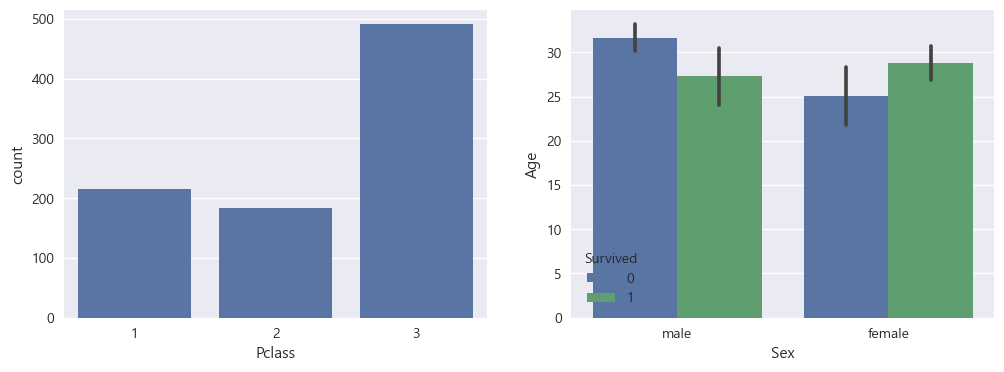

In [78]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1행 2열의 서브플롯 생성
sns.countplot(x='Pclass', data=data,ax=ax[0])
sns.barplot(x='Sex', y='Age',data=data, hue="Survived",ax=ax[1])

<Axes: xlabel='Pclass', ylabel='count'>

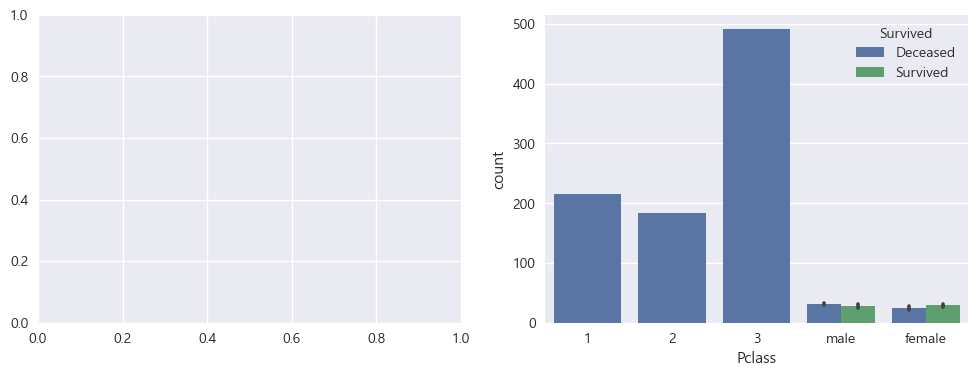

In [43]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1행 2열의 서브플롯 생성
sns.countplot(x='Pclass', data=data)
sns.barplot(x='Sex', y='Age',data=data, hue="Survived")

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> pairplot</span> 

▶ 다변량 데이터셋에서 각 변수 쌍 간의 관계를 시각적으로 표현하는 그래프 <br>
▶ 변수 간의 분포와 상관관계를 파악하는 데 사용함

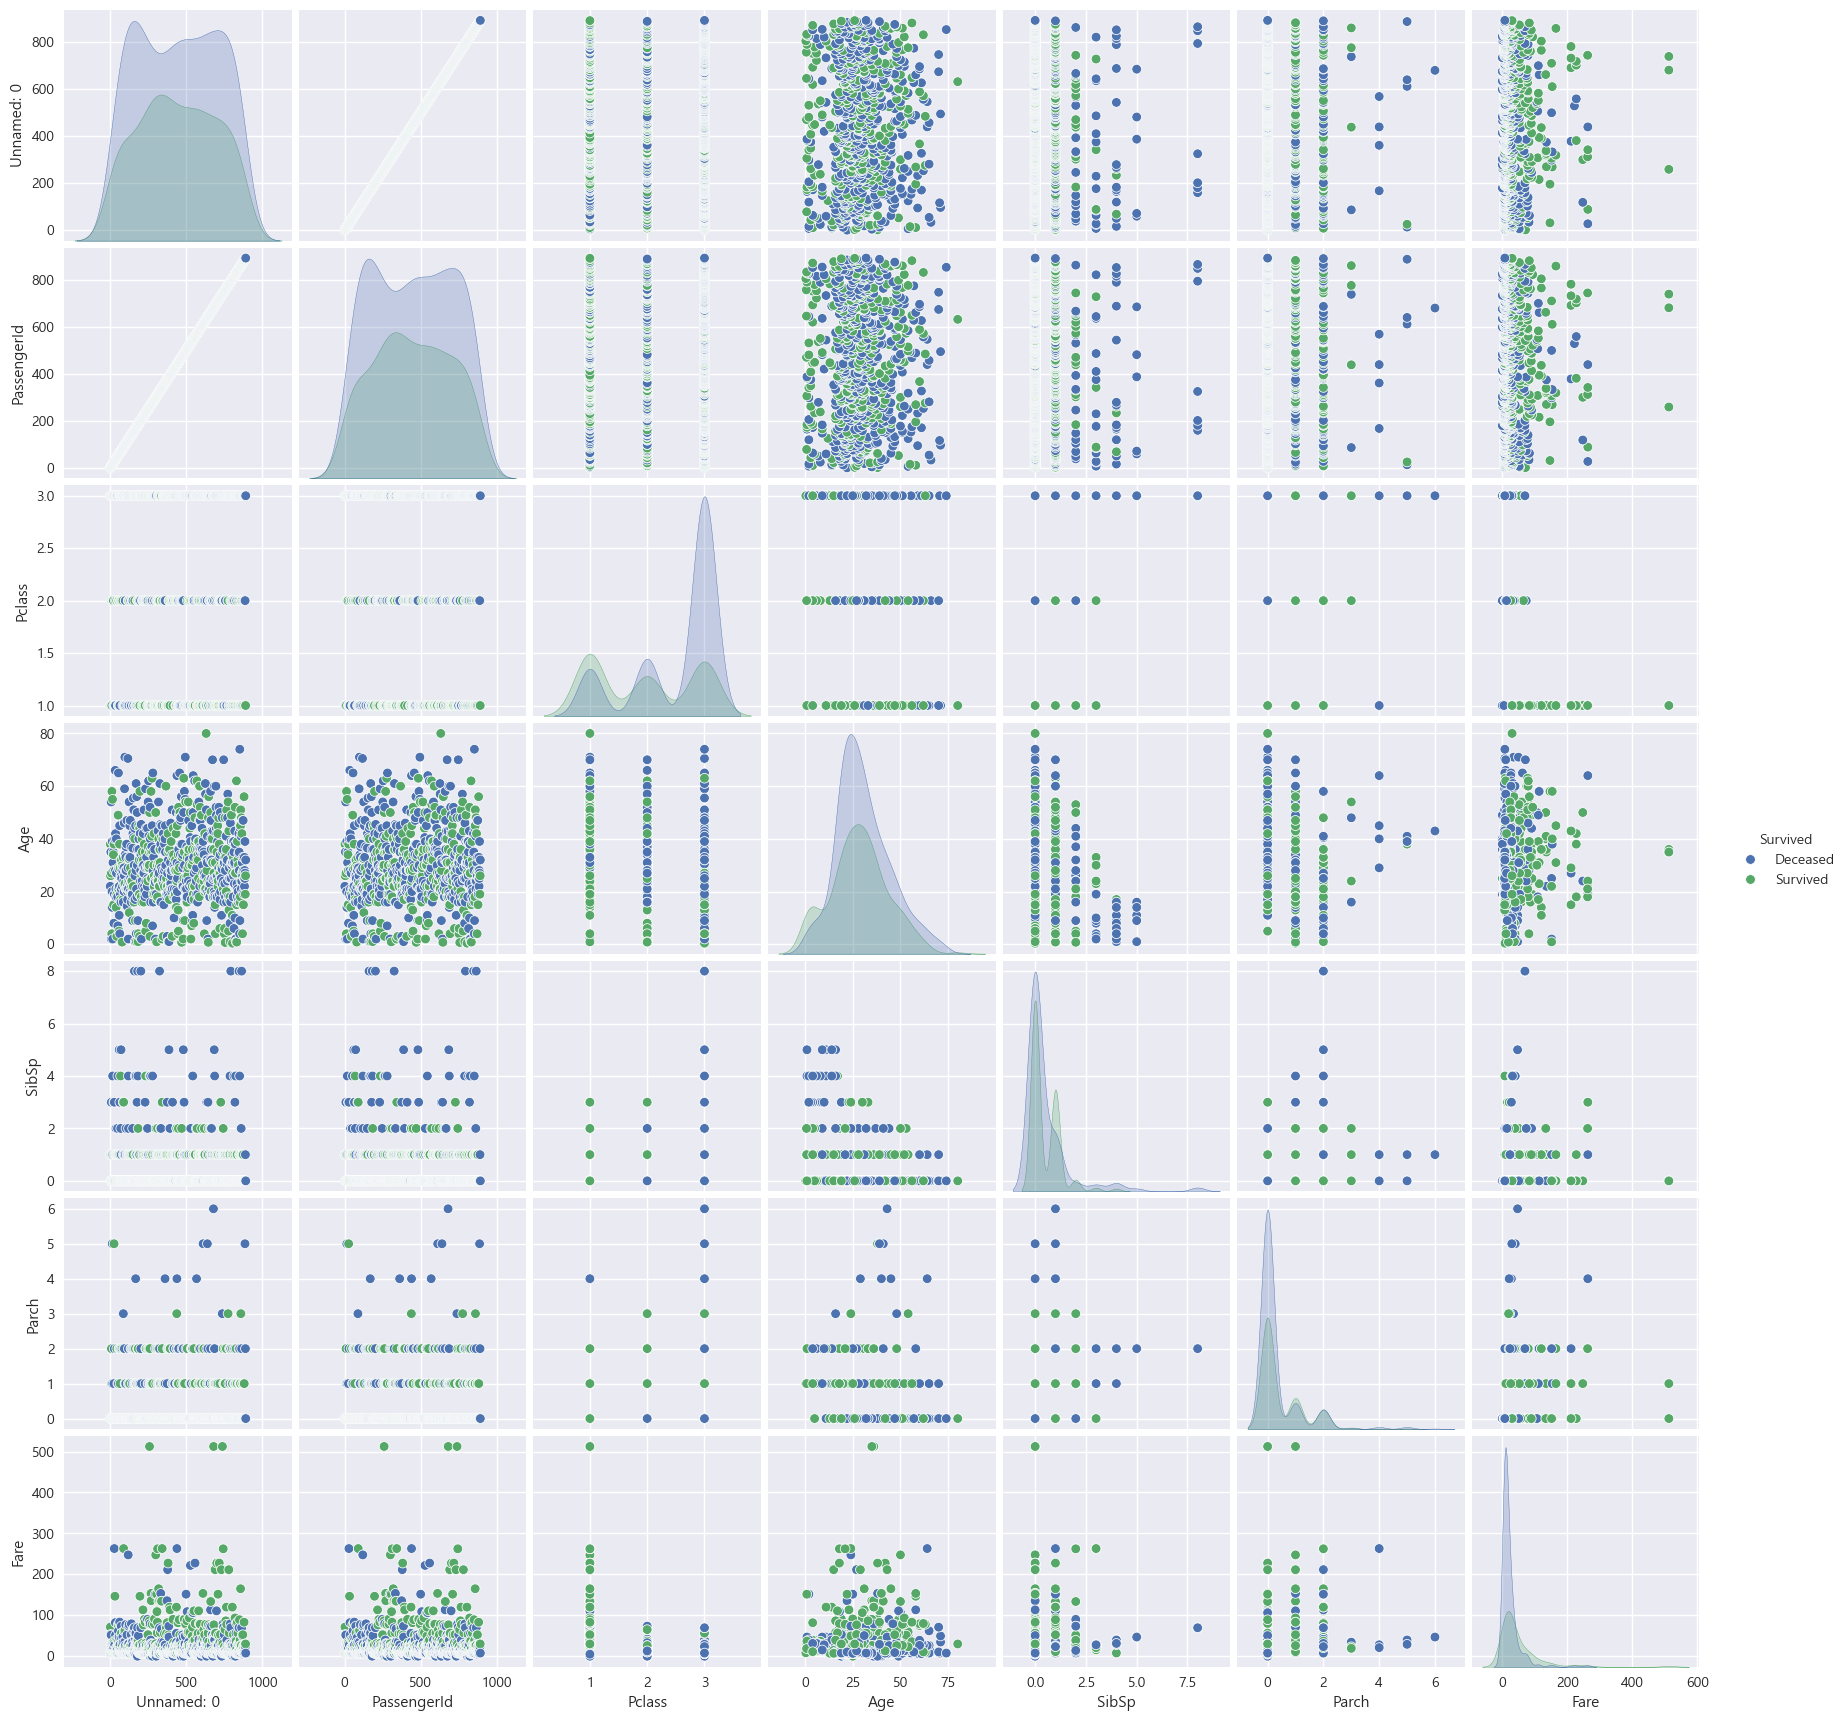

In [44]:
sns.pairplot(data=data, hue="Survived")

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 직접 찍어보기</span> 

### (7) 그래프를 그릴 2x2칸을 설정해보세요.

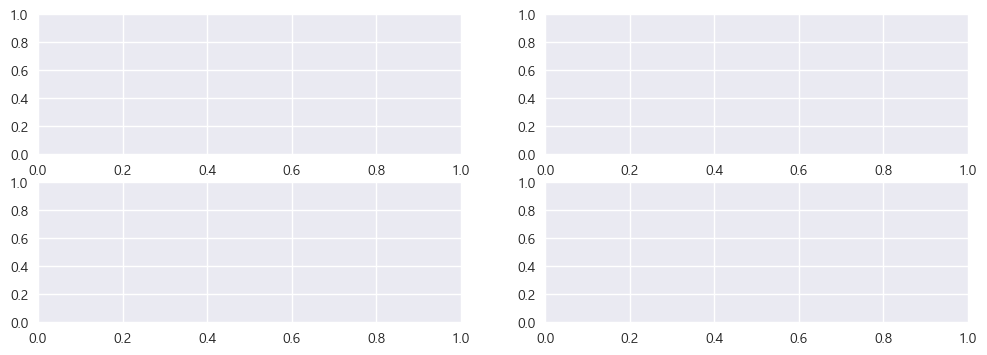

In [47]:
# 2행 2열의 서브플롯 생성
f, ax = plt.subplots(2, 2, figsize=(12, 4))

### (8) 1행 1열에 승선항(Embarked)별 승객의 수를 알 수 있는 시각화를 진행해보세요.

Q. 승객이 많은 승선항 순으로 나열하면? <br>
A. S⇒ C ⇒ Q

<Axes: xlabel='Embarked', ylabel='count'>

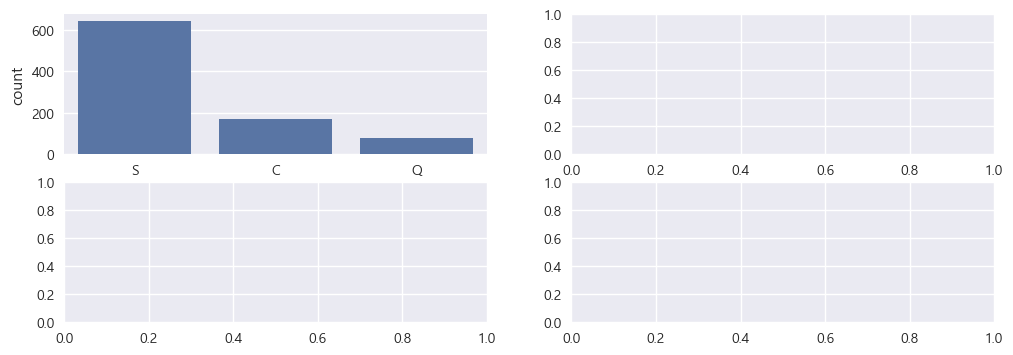

In [50]:
# 위 마크다운에 '?' 채우고 코드 작성
f, ax = plt.subplots(2, 2, figsize=(12, 4))
sns.countplot(data=data,x='Embarked',ax=ax[0][0])

### (9) 2행 2열에 객실 등급(Pclass)에 따른 생존율을 알아 볼 수 있는 시각화를 진행해보세요.

Q. 생존률이 가장 높은 등급은? <BR>
A. 1

<Axes: xlabel='Pclass', ylabel='Survived'>

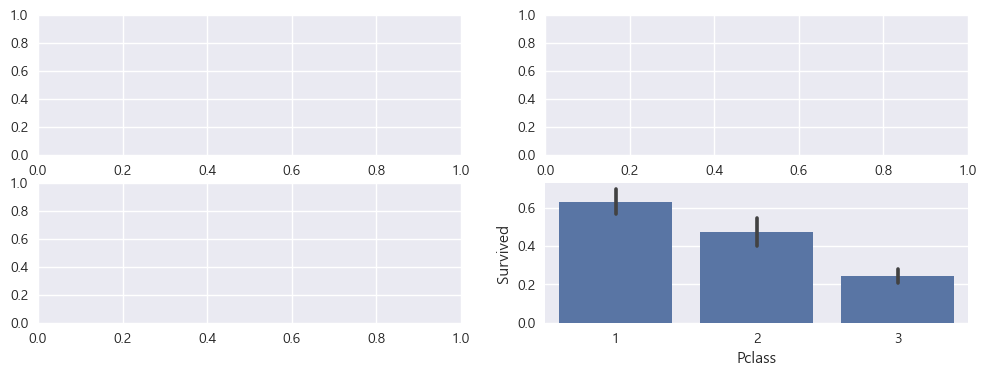

In [80]:
# 위 마크다운에 '?' 채우고 코드 작성
f, ax = plt.subplots(2, 2, figsize=(12, 4))
sns.barplot(data=data,x='Pclass',y='Survived',ax=ax[1][1])

### (10) 나머지 칸에 본인이 파악하고 싶은 정보를 자유롭게 시각화하고, 인사이트를 작성해보세요.

Q. 알아낸 것은? <BR>
A1. 객실 등급이 높을수록 생존율이 높다.  
A2. 남성보다 여성의 평균 생존율이 높으며, 1등급 객실 여성의 생존율이 가장 높다.  
A3. 객실 등급이 높을수록 탐승객의 평균 연령이 높으며 생존자의 평균 연령이 사망자의 평균 연령보다 낮다.

<Axes: xlabel='Pclass', ylabel='Age'>

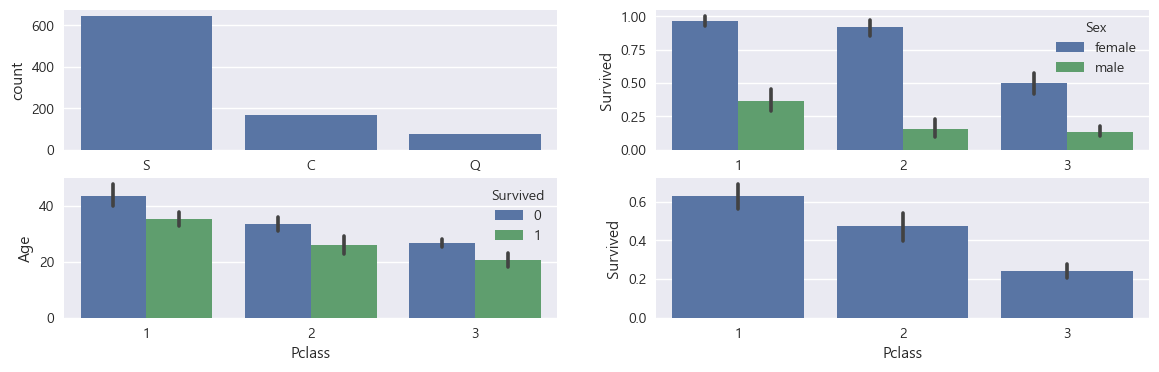

In [83]:
# 위 마크다운 채우고 자유롭게 코드 작성
f, ax = plt.subplots(2, 2, figsize=(14, 4))
sns.countplot(data=data,x='Embarked',ax=ax[0][0])
sns.barplot(data=data,x='Pclass',y='Survived',hue='Sex',ax=ax[0][1])
sns.barplot(data=data,x='Pclass',y='Survived',ax=ax[1][1])
sns.barplot(data=data,x='Pclass',y='Age',hue='Survived',ax=ax[1][0])